# Исследование объявлений о продаже квартир

**Цель исследования** — проверить гипотезы:
1. Площадь квартиры в значительной мере влияет на её стоимость: чем больше площадь, тем выше цена.
2. Квартиры на первом и последнем этажах непопулярны и их средняя стоимость ниже.
3. Цены на квартиры с годами растут.
4. Средняя цена квартир зависит от населённого пункта, вероятно, самые дорогие квартиры в Санкт-Петербурге.
5. Квартиры в центре Санкт-Петербурга дороже, чем на окраинах.

**Ход исследования**

 1. Обзор данных для определения их качества и основных проблем.
 2. Предобработка данных.
 3. Проверка гипотез.


### Загрузка данных

In [1]:
# импорт библиотек
import warnings 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# убираем вывод предупреждений
warnings.filterwarnings('ignore')

Загрузим данные и посмотрим на него:

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')  
    
except:
    data = pd.read_csv('real_estate_data.csv')
    
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Все столбцы склеились, потому что **в качестве разделителя использовали знак табуляции. Поправим это:**

In [4]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t')  
    
except:
    data = pd.read_csv('real_estate_data.csv', sep='\\t')    

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь данные корректо разбиты по столбцам. Уже в первых строках видны пропуски, не всё хорошо и с названиями столбцов. Посмотрим общую информацию о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 23 699 строк и 22 столбца, во многих из которых есть пропуски. Особо большое количество пропусков в столбцах *'is_apartment', 'parks_nearest'* и *'ponds_nearest'*. 

Также для удобства дальнейшей работы **стоит изменить название столбцов *'cityCenters_nearest'*, *'parks_around3000'* и *'ponds_around3000'***. 

In [6]:
# переименование столбцов
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 'parks_around3000' : 'parks_around_3000', \
                    'ponds_around3000' : 'ponds_around_3000'}, inplace=True) 
data.columns 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Чтобы **оценить разброс данных** в разных столбцах и **возможные проблемы** в них, посмотрим на гистограммы для всего датафрейма. 

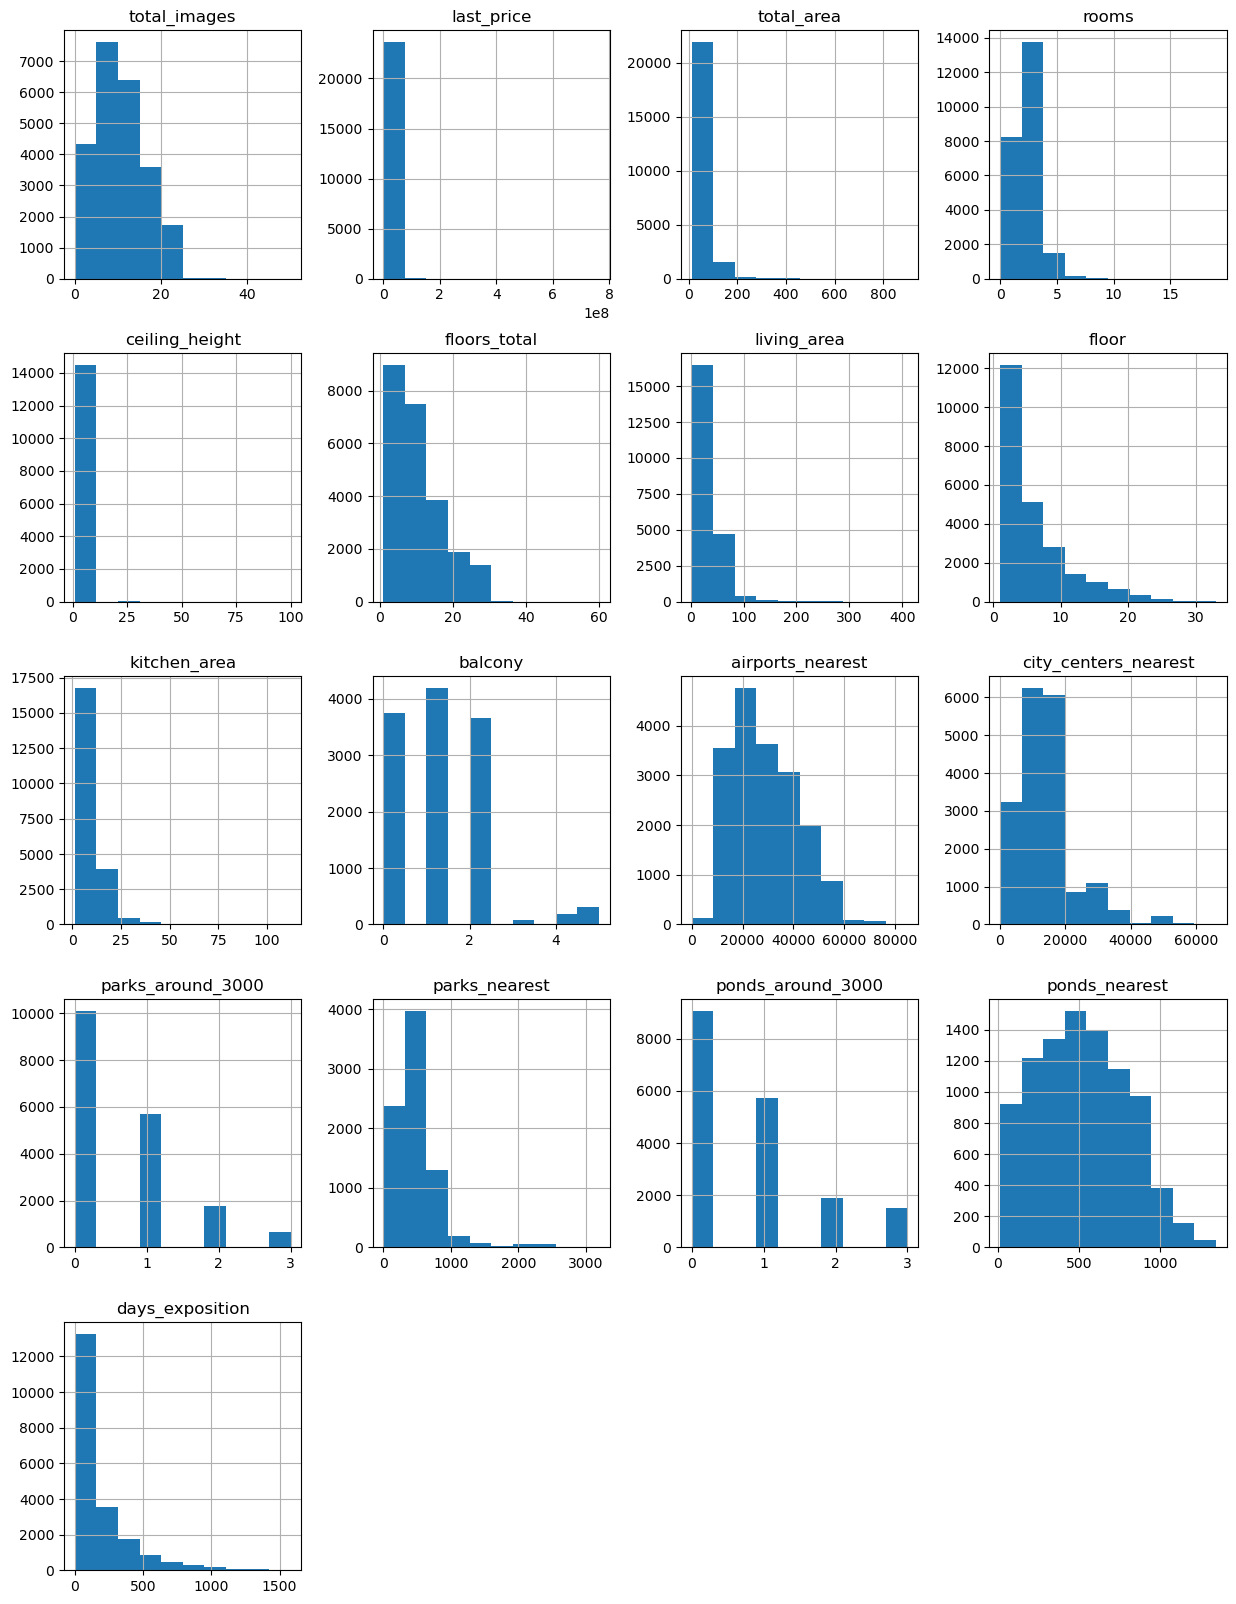

In [7]:
data.hist(figsize=(15, 20))
plt.show();

**По гистограммам хорошо видно, что есть слишком большие выбивающиеся значения в столбцах *'last_price', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'rooms'*.**

В тоже время гистограммы для оставшихся столбцов выглядят на данном этапе приемлемо. 

### Предобработка данных

#### Работа с пропусками

Первым делом необходимо разобраться с пропусками в данных. Посмотрим, сколько их всего:

In [8]:
pd.DataFrame(round(data.isna().mean()*100, 4)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799100
floors_total,0.362900
living_area,8.029900
floor,0.000000
is_apartment,88.290600


Пропусков в данных очень много. **Для начала разберёмся со столбцом *'is_apartment'*, который почти полностью состоит из пропусков.** 

In [9]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Видно, что столбец хранит в себе массив булевых значений. **Логичнее всего заполнить пропуски значением 'False'**, поскольку люди при отсутствии чего-то часто просто пропускают такие пункты, да и было бы странно, что практически 90% предложений - апартаменты. Более того, данные из данного столбца непринципиальны для дальнейшего иссследования.

In [10]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)
data['is_apartment'].unique()

array([False,  True])

Много пропусков содержит и **столбец 'balcony'**, хранящий в себе число балконов. Здесь, как и в предыдущем случае логично будет **приравнять пропуски к отсутствию балкона**. И так как по смыслу этот столбец содержит целочисленные значения, поменяем тип данных на *''int'*.

In [11]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

**Столбцы *'parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'ponds_around_3000', 'parks_around_3000'* хранят картографическую информацию**. Эти данные получали автоматически на основании географического положения и, вероятнее всего, пропуски здесь связаны с техническими сбоями.

**Столбцы *'ceiling_height', 'kitchen_area', 'living_area', 'days_exposition'* содержат информацию, которую вносили люди** - пропуски здесь могут быть вызваны человеческим фактором, хотя нельзя исключать и технические проблемы. Людям свойственно ошибаться - на гистограммах именно **для этих столбцов мы видим наличие выбросов**.

Пропусков в описанных столбцах очень много и отбросить просто так мы их не можем. Несмотря на то, что несут они довольно разную информацию, все они описывают **количественные характеристики**, поэтому **разумнее всего будет заполнить пропуски медианным значением** (во избежание влияния выбросов). Пропуски в  столбцах, содержащих географические характеристики, а также высоту потолков можно попытаться заполнить сначала медианным значением относительно своего района. 

In [12]:
# замена пропусков в столбцах медианнным значением для этих столбцов относительного своего района:
for name in data['locality_name'].unique():
    for column in ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'ponds_around_3000', \
                   'parks_around_3000', 'ceiling_height']:
        data.loc[(data[column].isna()) & (data['locality_name'] == name), column] = \
        data.loc[data['locality_name'] == name, column].median()

# замена оставшихся пропуски в столбцах общим медианнным значением для этих столбцов:
for t in ['parks_nearest', 'ponds_nearest', 'airports_nearest', 'city_centers_nearest', 'ponds_around_3000', \
          'parks_around_3000', 'ceiling_height', 'kitchen_area', 'living_area', 'days_exposition']:
    data.loc[data[t].isna(), t] = data[t].median()

Столбцы **'floors_total' и 'locality_name'** содержат **очень мало пропусков** - 86 и 49, соответственно. Столбец **'locality_name' содержит категориальные значения**, поэтому осмысленно заполнить пропуски в нём нет возможности. Столбец **'floors_total' содержит количественные значения**, и пропуски в нём можно было бы заполнить медианным значением. Однако в дальнейшем **может возникнуть проблема при определении последнего/первого этажа** (если номер этаж окажется больше, чем общее число этажей). И, поскольку данные пропуски составляют менее процента от всей выборки, **безопаснее их отбросить**.

Но перед этим убедимся, что ничего не пропустили:

In [13]:
# удаление строк с пропусками в столбцах 'floors_total' и 'locality_name'
data = data.dropna(subset=['floors_total', 'locality_name']).reset_index(drop=True)
data.isna().sum() 

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around_3000       0
parks_nearest           0
ponds_around_3000       0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Замена типов данных

**В столбцах *'is_apartment'* и  *'balcony'* уже поменяли тип данных** в соответствии с их наполнением. Ещё раз посмотрим, какие типы данных определены для других столбцов: 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  int32  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

В столбцах ***'parks_around_3000', 'ponds_around_3000', 'days_exposition'* и *'floors_total'***, исходя из гистограмм и здравого смысла, хранятся **целочисленные значения**. Аналогично поступим и со столбцом ***'last_price'*** - нет смысла рассматривать цены на недвижимость с точностью до копеек.

In [15]:
for t in ['parks_around_3000', 'ponds_around_3000', 'days_exposition', 'floors_total', 'last_price']:
    data[t] = data[t].astype(int)

Столбец ***'first_day_exposition'* хранит в себе даты** вида '2019-03-07T00:00:00', переведём его значения в соответствующий формат:

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Работа с дубликатами

Из всех столбцов **только *'locality_name'* содержит строковые значения**, в которых записаны названия населённых пунктов. Чтобы избежать **неявных дубликатов, которые могут скрываться в нём**, посмотрим какие уникальные значения он хранит в себе:

In [17]:
data['locality_name'].sort_values().unique() 

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Часть дубликатов в названиях **может быть связана с е/ё**. Также может возникнуть **проблема с 'городской поселок'/'поселок городского типа'/'поселок'**. Чтобы решить эту проблему и облегчить восприятие данных **оставим только 'поселок'**. Проведём описанные замены:

In [18]:
# функция, которая заменит все ё на е, а также внесёт больше единообразия в обозначение населённых пунктов
def replacer(string):
    for i in range(len(string)):
        string[i] = string[i].replace('ё','е')
        string[i] = string[i].replace('городской поселок','поселок')
        string[i] = string[i].replace('поселок городского типа','поселок')
        string[i] = string[i].replace('коттеджный поселок','поселок')
        string[i] = string[i].replace('деревня','поселок')

# применяем функцию к столбцу с названиями населённых пунктов        
replacer(data['locality_name']) 

Поправим оставшиеся неявные дубликаты:

In [19]:
data['locality_name'] = (data['locality_name'].replace('Кудрово', 'поселок Кудрово')
                            .replace('Любань', 'поселок Любань')
                            .replace('Мурино', 'поселок Мурино')
                            .replace('поселок Павлово', 'село Павлово')
                            .replace('садовое товарищество Павлово', 'поселок Павлово')
                            .replace('садовое товарищество Рахья', 'поселок Рахья')
                            .replace('поселок при железнодорожной станции Вещево', 'поселок станции Вещево')
                            .replace('поселок при железнодорожной станции Приветнинское', 'поселок станции Приветнинское')
                            .replace('поселок Саперное', 'поселок Саперный')
                        )

**Теперь проверим датасет на наличие явных дубликатов:**

In [20]:
data.duplicated().sum() 

0

**Явных дубликатов нет**. Теперь можем перейти к обработке аномальных значений.

#### Работа с аномальными значениями

Как уже было отмечено ранее, выбивающиеся значения есть в столбцах *'last_price', 'total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'rooms'*.

**Рассмотрим для начала значения столбца *'ceiling_height'***:

In [21]:
data['ceiling_height'].sort_values().unique()

array([  1.   ,   1.2  ,   1.75 ,   2.   ,   2.2  ,   2.25 ,   2.3  ,
         2.34 ,   2.4  ,   2.45 ,   2.46 ,   2.47 ,   2.48 ,   2.49 ,
         2.5  ,   2.51 ,   2.515,   2.52 ,   2.525,   2.53 ,   2.54 ,
         2.55 ,   2.555,   2.56 ,   2.56 ,   2.57 ,   2.575,   2.58 ,
         2.59 ,   2.6  ,   2.6  ,   2.61 ,   2.615,   2.62 ,   2.625,
         2.63 ,   2.64 ,   2.65 ,   2.65 ,   2.66 ,   2.67 ,   2.675,
         2.68 ,   2.69 ,   2.7  ,   2.71 ,   2.72 ,   2.725,   2.73 ,
         2.74 ,   2.75 ,   2.76 ,   2.77 ,   2.78 ,   2.79 ,   2.8  ,
         2.81 ,   2.82 ,   2.83 ,   2.84 ,   2.85 ,   2.86 ,   2.87 ,
         2.88 ,   2.89 ,   2.9  ,   2.91 ,   2.92 ,   2.93 ,   2.94 ,
         2.95 ,   2.96 ,   2.97 ,   2.98 ,   2.99 ,   3.   ,   3.01 ,
         3.02 ,   3.03 ,   3.04 ,   3.05 ,   3.06 ,   3.07 ,   3.08 ,
         3.09 ,   3.1  ,   3.11 ,   3.12 ,   3.13 ,   3.14 ,   3.15 ,
         3.16 ,   3.17 ,   3.18 ,   3.2  ,   3.21 ,   3.22 ,   3.23 ,
         3.24 ,   3.

Высота потолков ниже 2.4 м (минимальная норма высоты потолков в России) представляется нереалистичной. **Излишне высокие значения также выглядят нереалистично, особенно цифры выше 10 м** (можно допустить, что это относится к элитному жилью, но всему есть пределы). Это подтверждает и построенной ранее гистограмма - на ней видно, что все значения сконцентрированы вблизи нуля. 

Можно предположить, что значения 22.6, 24., 25., 26., 27., 27.5, 32, 100 больше истинных на порядок. В тоже время излишне низкие значения объяснить затруднительно и безопаснее всего будет их исключить. **Посмотрим на диаграмму размаха**: 

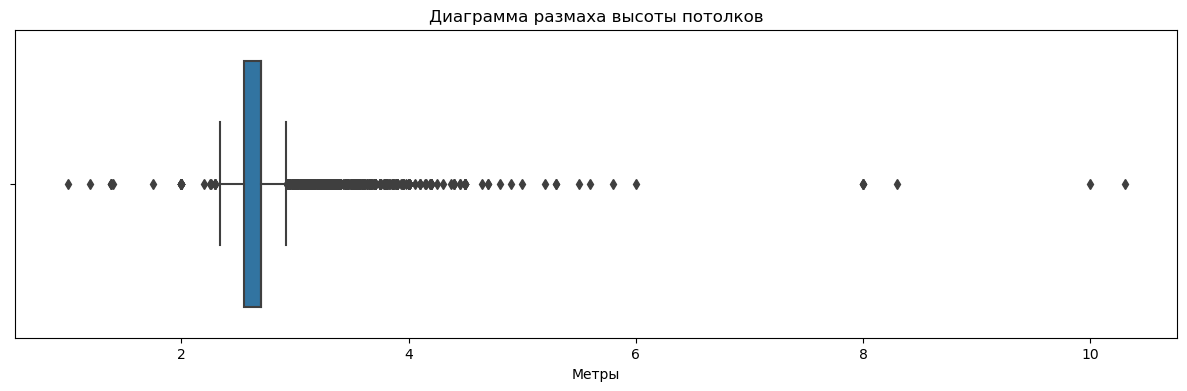

In [22]:
# цикл, уменьшающий слишком большие значения на порядок
for i in range(len(data['ceiling_height'])):
    if data['ceiling_height'][i] > 11:
        data['ceiling_height'][i] = data['ceiling_height'][i] / 10

# построение диаграммы размаха 
plt.figure(figsize=(15, 4))

sns.boxplot(x=data['ceiling_height'])

plt.title(label='Диаграмма размаха высоты потолков')
plt.xlabel('Метры')
plt.show();

Расстояние между 1ым и 3им квартилем очень маленькое. **Наибольшее число выбросов находится в диапазоне ~ 3-4 м, выше этого значения, а также ниже 1ого квартиля единичные**. Чтобы не ошибиться в оценке посмотрим на численные характеристики:

In [23]:
data['ceiling_height'].describe()

count    23565.000000
mean         2.704945
std          0.247443
min          1.000000
25%          2.550000
50%          2.700000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

Любопытно, что медиана и 3ий квартиль совпадают с высокой точностью. Можем посчитать 'размер усов': 1.5 * (2.70 - 2.55) = 0.225, тогда значения меньше 2.325 м и больше 2.925 м можно рассматривать как выбросы. За нижнюю границу примем всё же минимальную норму согласно законадательству - 2.4 м, а верхнюю округлим до 3 м:

In [24]:
# отрезаем слишком маленькие значения 
data_good = data.query('3 >= ceiling_height >= 2.4')       

**Рассмотрим теперь столбец *'last_price'.***

In [25]:
# проверим диапозон значений для столбца
data_good['last_price'].sort_values().unique() 

array([    12190,    430000,    440000, ..., 401300000, 420000000,
       763000000])

**Цены в районе десятков тысяч выглядят сомнительно. Квартиры ценой в сотни миллионов также вряд ли широко представлены**. Построим гистограмму в диапозоне цен 500 000 - 30 000 000.

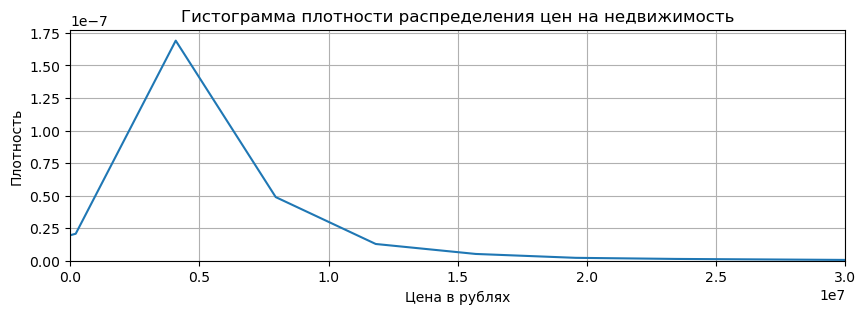

In [26]:
# построение распределение плотности для цены, по которой была продана недвижимость
plt.figure(figsize=(10, 3))

sns.kdeplot(x=data_good['last_price'])

plt.title(label='Гистограмма плотности распределения цен на недвижимость')
plt.xlabel('Цена в рублях')
plt.grid(True)
plt.xlim((0, 30000000))
plt.ylabel('Плотность')
plt.show();

Ограничимся ценами 500 000-20 000 000 рублей - в данном диапазоне **распределение цен выглядит естественно**, при этом **в него попадает большая часть данных**.

In [27]:
data_good = data_good.query('500000 <= last_price <= 20000000')

Согласно первым построенным гистограммам **большая часть значений для *'kitchen_area', 'living_area'* и *'total_area'* находятся до 25, 100 и 200 м2, соответственно**. Из соображений здравого смысла ограничим нижние значения в 7, 15 и 25 м2 для кухни, жилой и общей площади, соответственно.

In [28]:
# берём срез, интересующих данных
data_good = data_good.query('(7 <= kitchen_area <= 25) and (15 <= living_area <= 100) and (25 <= total_area <= 200)')

**Последний столбец, который осталось проверить, это *'rooms'***. Из гистограммы построенной при первичном знакомстве с данными было видно, что практически все значения укладываются в диапозоне до пяти. И т.к. меньше одной комнаты быть не может, **оставим для дальнейшей работы значения 1-5:**

In [29]:
data_good = data_good.query('1 <= rooms <= 5') 

Также на предварительно построенных гистограммах видно, что **дома выше 30 этажей практически не представлены в выборке. Аналогично уходят в ноль и значения столбца 'days_exposition' больше 1000 дней**, уберём их:

In [30]:
data_good = data_good.query('(1 <= floors_total <= 30) and (1 <= days_exposition <= 1000)')
data_good.shape 

(15834, 22)

Итак, на данный момент у нас **осталось почти 70% исходных данных** (16697 / 23699). Посмотрим, как изменился вид гистограмм для них:  

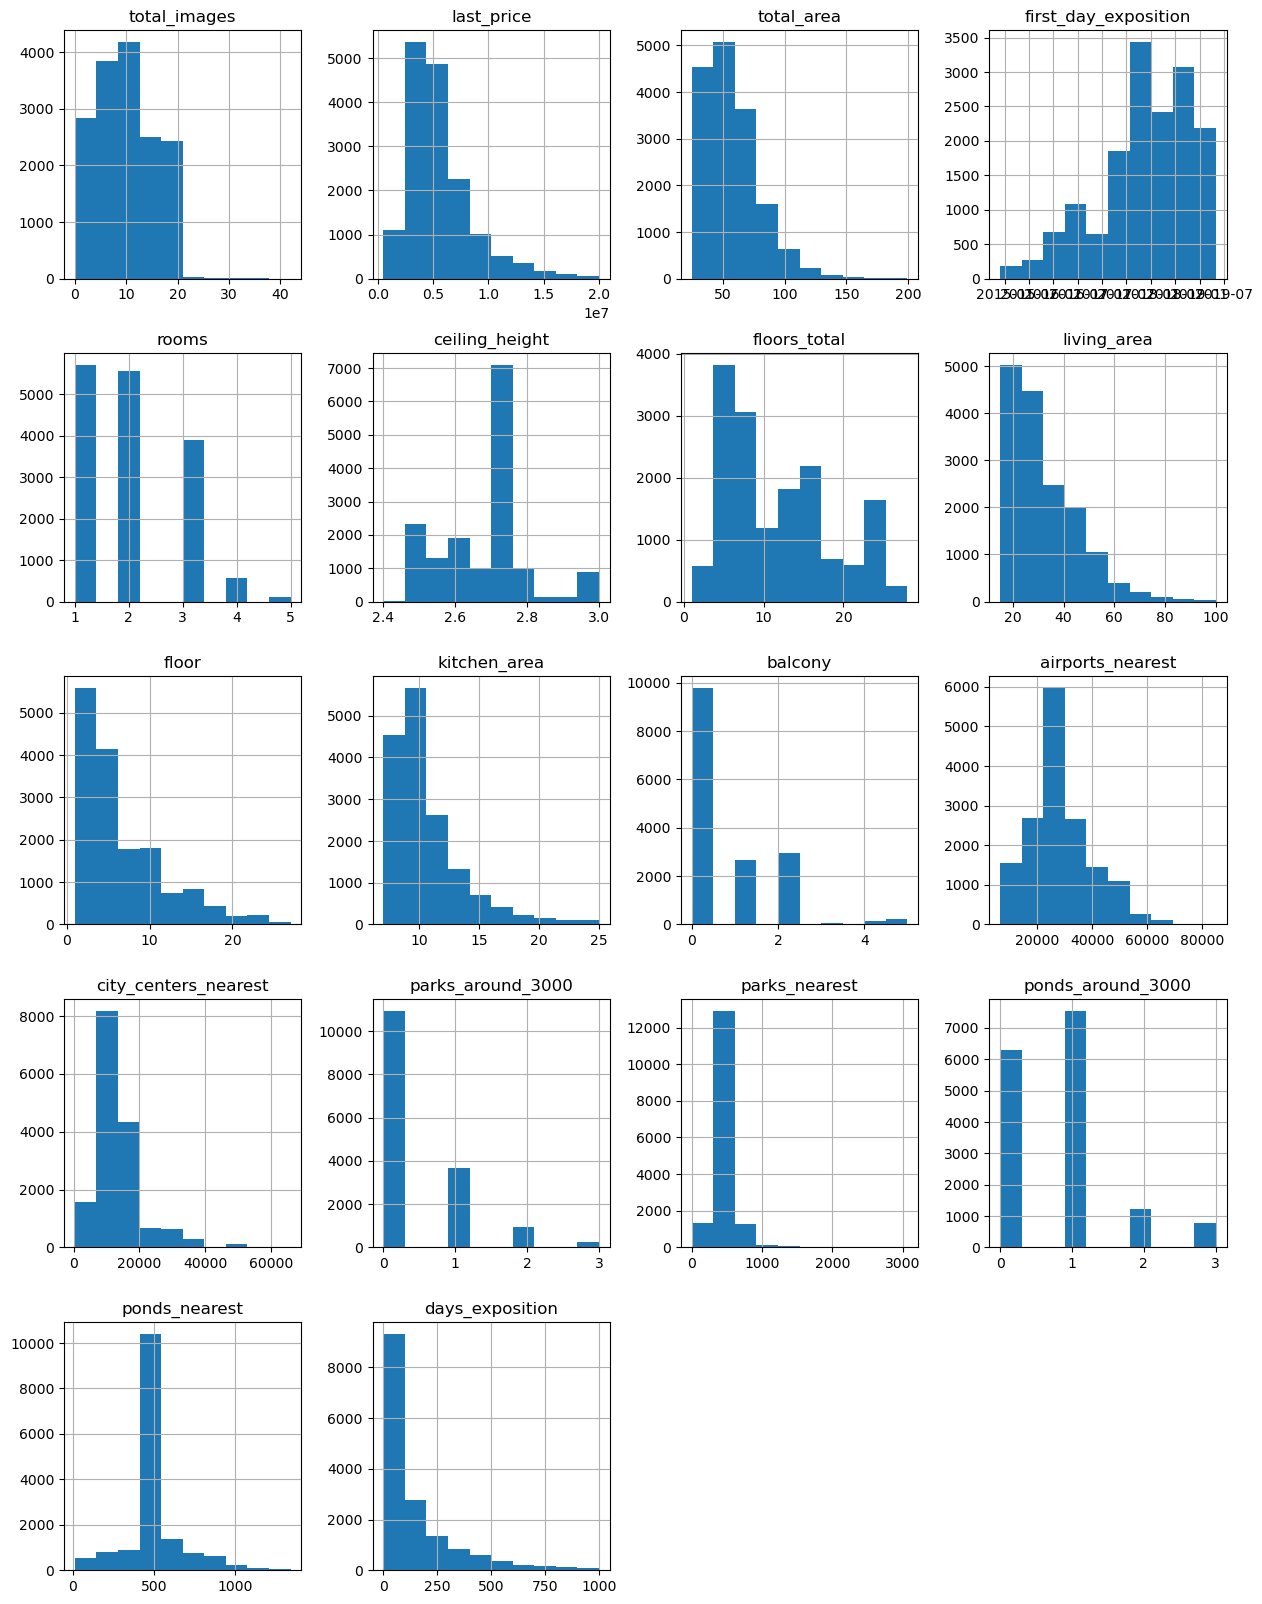

In [31]:
data_good.hist(figsize=(15, 20))
plt.show();

После внесённых изменений **гистограммы для большинства параметров стали выглядеть лучше**. **На 'parks_nearest' и 'ponds_nearest' появились отчётливо видимые пики, соответствующие медианному значению**, но это закономерно - больше половины значений были пропущены в этих столбцах. **Распределения для 'airports_nearest' и 'city_centers_nearest' выглядят почти хорошо**, хотя также явно пострадали от большого числа пропусков.

**Для основных интересующих нас параметров распределения выглядят достаточно хорошо**. Поэтому перейдём к следующему шагу - рассчитаем и добавим в датафрейм столбцы с полезными для дальнейшего исследования данными. 

### Добавление новых столбцов

**Цена и площадь являются связанными параметрами**, как подсказывает нам жизненный опыт. Посмотрим на диграмму рассеяния для данных параметров:

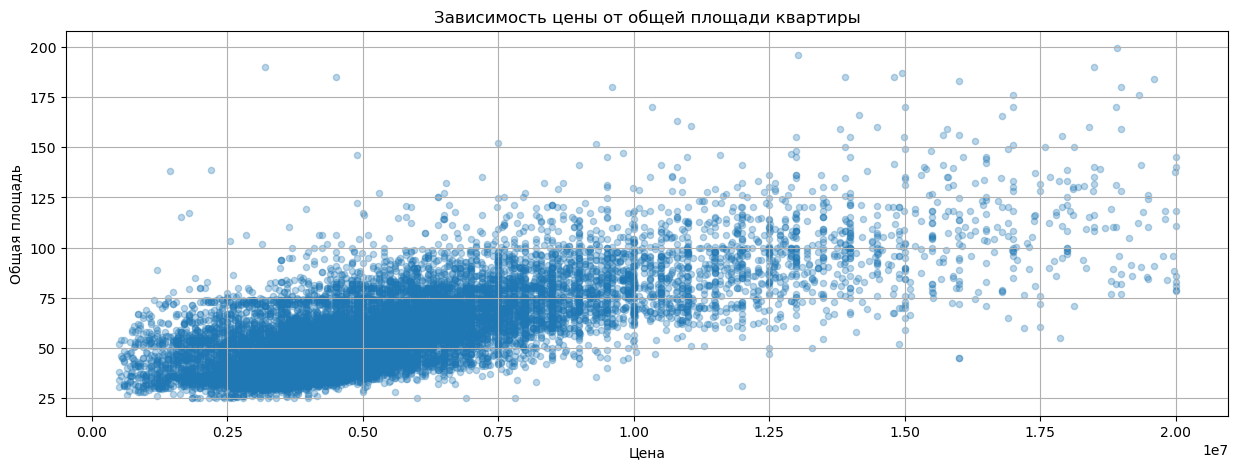

In [32]:
# построение диаграммы рассеяния для цены и общей площади
data_good.plot(x='last_price', y='total_area', title='Зависимость цены от общей площади квартиры', \
               kind='scatter', grid=True, alpha=0.3, figsize=(15, 5))
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show();

Диаграмма рассеяния вполне согласуется с житейским опытом - **цена прямопропорционально зависит от площади**. Втаком случае, **посчитаем удельную характеристику - цену квадратного метра** - и добавим её в новый столбец *'square_meter_price'*.  

In [33]:
# создаём новый столбец в отфильтрованных данных, с информацией о цене за квадратный метр
data_good['square_meter_price'] = (data_good['last_price'] / data_good['total_area']).astype(int)

**Время публикации объявления может сказываться на скорости продажи квартиры**, чтобы оценить этот фактор **разобьём дату на три параметра - год, месяц и день недели**. Сохраним эти данные в столбцы *'year_exposition', 'month_exposition'* и *'weekday_exposition'*.

In [34]:
# создаём столбцы в отфильтрованном датафрейме, которые будут хранить год, месяц и день недели, когда было дано объявление
data_good['year_exposition'] = data_good['first_day_exposition'].dt.year
data_good['month_exposition'] = data_good['first_day_exposition'].dt.month
data_good['weekday_exposition'] = data_good['first_day_exposition'].dt.weekday

**На продажу квартиры нередко влияет этаж.** Разобьём данные на **три группы - первый, последний и другой этаж.**  

In [35]:
# функцию, которая будет определять тип этажа 
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    return None    

In [36]:
# новый столбец в отфильтрованном датафрейме,который будет хранить тип этажа
data_good['floor_type'] = data_good.apply(floor_type, axis=1) 
data_good['floor_type'].isna().sum() 

0

Ещё одним **важным фактором определяющим привлекательность и цену квартиры является близость к центру города**. Для того, чтобы было проще воспринимать и анализировать эти данные, переведём значения столбца *'city_centers_nearest'* в километры и сохраним в новом столбце. 

In [37]:
# создаём столбец 'city_centers_nearest_km' для хранения расстояния до центра в километрах
data_good['city_centers_nearest_km'] = (data_good['city_centers_nearest'] / 1000).astype(int)

На этом подготовка данных закончена, можем перейти к анализу.

### Исследовательский анализ данных

#### Обзор данных

Начнём анализ с того, что рассмотрим важнейшие характеристики поближе. Для начала **построим гистограммы для площадей - общей, жилой и кухни**.

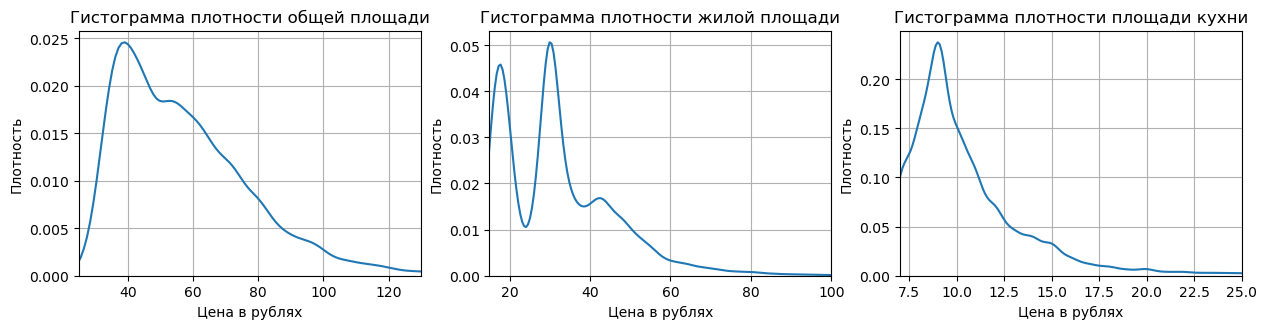

In [38]:
# построение гистограмм плотности для площадей
fig = plt.figure(figsize=(15, 7))

fig.add_subplot(231)
sns.kdeplot(x=data_good['total_area'])
plt.title(label='Гистограмма плотности общей площади')
plt.grid(True)
plt.xlabel('Цена в рублях')
plt.xlim((25, 130))
plt.ylabel('Плотность')

fig.add_subplot(232)
sns.kdeplot(x=data_good['living_area'])
plt.title(label='Гистограмма плотности жилой площади')
plt.grid(True)
plt.xlabel('Цена в рублях')
plt.xlim((15, 100))
plt.ylabel('Плотность')

fig.add_subplot(233)
sns.kdeplot(x=data_good['kitchen_area'])
plt.title(label='Гистограмма плотности площади кухни')
plt.grid(True)
plt.xlabel('Цена в рублях')
plt.xlim((7, 25))
plt.ylabel('Плотность')

plt.show();

За исключением гистограммы **для жилой площади**, на которой отчётливо видно **три пика в районе 15 и 30 м2 (самые крупные), а также ~ 40 м2**, распределения для остальных площадей напоминают распределениемю Пуассона (хотя для общей площади также видно плечо, которое перекочевало, вероятно, из жилой площади). **Необычный вид распределение для жилой площади**, вероятно, связан с числом комнат. Тогда **первый пик соответствует однокомнатным квартирам, второй - двукомнатным, а третий - трёхкомнатным**. С другой стороны, кухня обычно одна. 

Рассмотрим **распределение значений для числа комнат, этажа, общего количества этажей, а также его типа**:

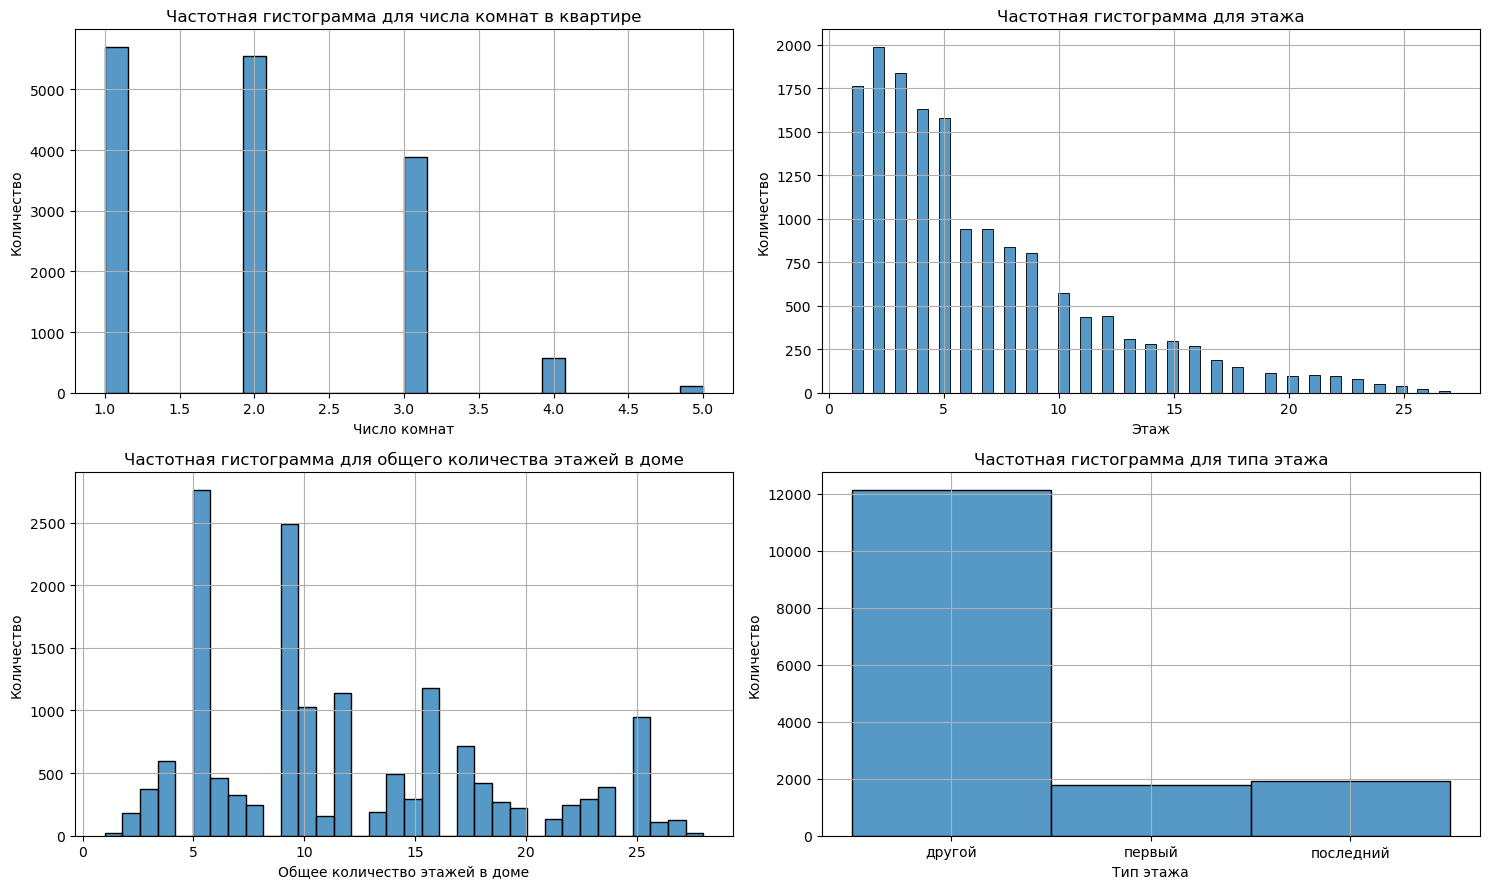

In [39]:
# построение частотных гистограмм 
fig = plt.figure(figsize=(15, 9))

fig.add_subplot(221)
sns.histplot(data_good['rooms']) 
plt.title('Частотная гистограмма для числа комнат в квартире')
plt.ylabel('Количество')
plt.xlabel('Число комнат')
plt.grid(True)

fig.add_subplot(222)
sns.histplot(data_good['floor']) 
plt.title('Частотная гистограмма для этажа')
plt.ylabel('Количество')
plt.xlabel('Этаж')
plt.grid(True)

fig.add_subplot(223)
sns.histplot(data_good['floors_total']) 
plt.title('Частотная гистограмма для общего количества этажей в доме')
plt.ylabel('Количество')
plt.xlabel('Общее количество этажей в доме')
plt.grid(True)

fig.add_subplot(224)
sns.histplot(data_good['floor_type']) 
plt.title('Частотная гистограмма для типа этажа')
plt.ylabel('Количество')
plt.xlabel('Тип этажа')
plt.grid(True)

plt.tight_layout()
plt.show();

Действительно, **одно- и двукомнатные квартиры наиболее представлены в выборке**. С другой стороны **трёхкомнатных также достаточно много**, возможно, с ними связано некоторое **увеличение числа предложений в области 40 м2 на гистограмме для жилой площади**. 

На гистограмме распределения этажей можем выделить три группы: с 1 по 5, 6-10 и выше 10. **Наиболее крупная группа это квартиры на 1-5 этажах.**  Если смотреть на этажность домов, то несомненные **лидеры - 5- и 9-этажки**. Далее **можно отметить 10-, 12-, 16- и 25-этажки**. Остальных представителей сравнительно мало. **Распределение по группам первый/последний/другой ожидаемо** - первый и последний этаж всегда один в доме и их доли практически равны. В тоже время "других" этажей бывает много, что хорошо видно на гистограмме.

Посмотрим теперь поближе **на распределение высоты потолков**:

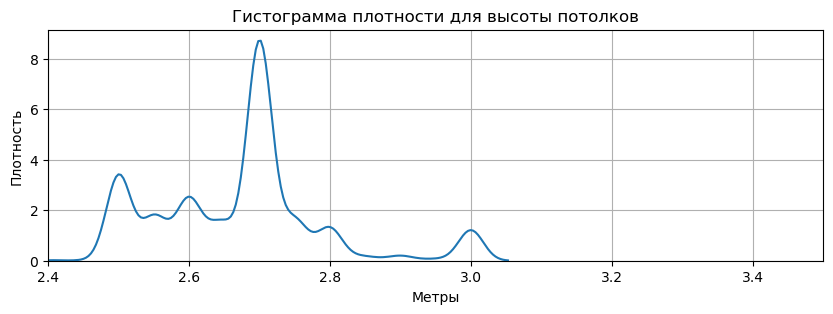

In [40]:
# построение гистограммы плотности
plt.figure(figsize=(10, 3))

sns.kdeplot(x=data_good['ceiling_height'])

plt.title(label='Гистограмма плотности для высоты потолков')
plt.grid(True)
plt.xlabel('Метры')
plt.xlim((2.4, 3.5))
plt.ylabel('Плотность')
plt.show();

Типичная высота потолков ~2.6 м, а **в диапозон 2.5-2.8 м укладывается подавляющее большинство значений**. Стоит отметить и небольшой, но выразительный пик на 3 м.  

Ещё раз взглянем на гистограмму распределения **цен на квартиры**:

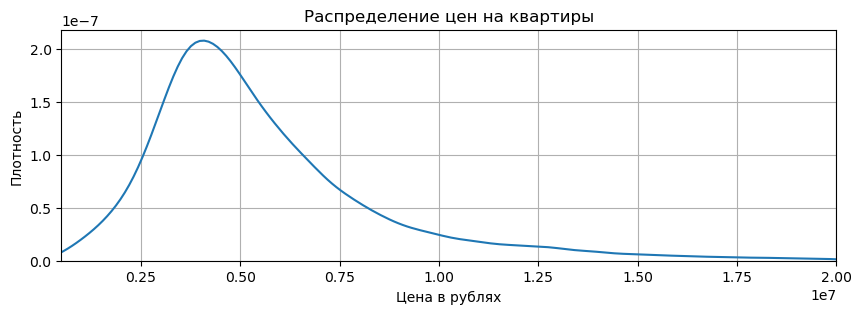

In [41]:
# построение гистограммы плотности
plt.figure(figsize=(10, 3))

sns.kdeplot(x=data_good['last_price'])

plt.title(label='Распределение цен на квартиры')
plt.grid(True)
plt.xlabel('Цена в рублях')
plt.xlim((500000, 20000000))
plt.ylabel('Плотность')
plt.show();

Как видно, **чаще всего квартиры покупают за 2.5 - 7.5 млн.**, что выглядит вполне реалистично, как и само распределение.

**Рассмотрим теперь картографические данные.** Наличие поблизости парков и водоёмов может быть приятным бонусом при покупке жилья. Однако, в данных столбцах было очень много пропусков, которые, вероятно, сильно искажают картину: 

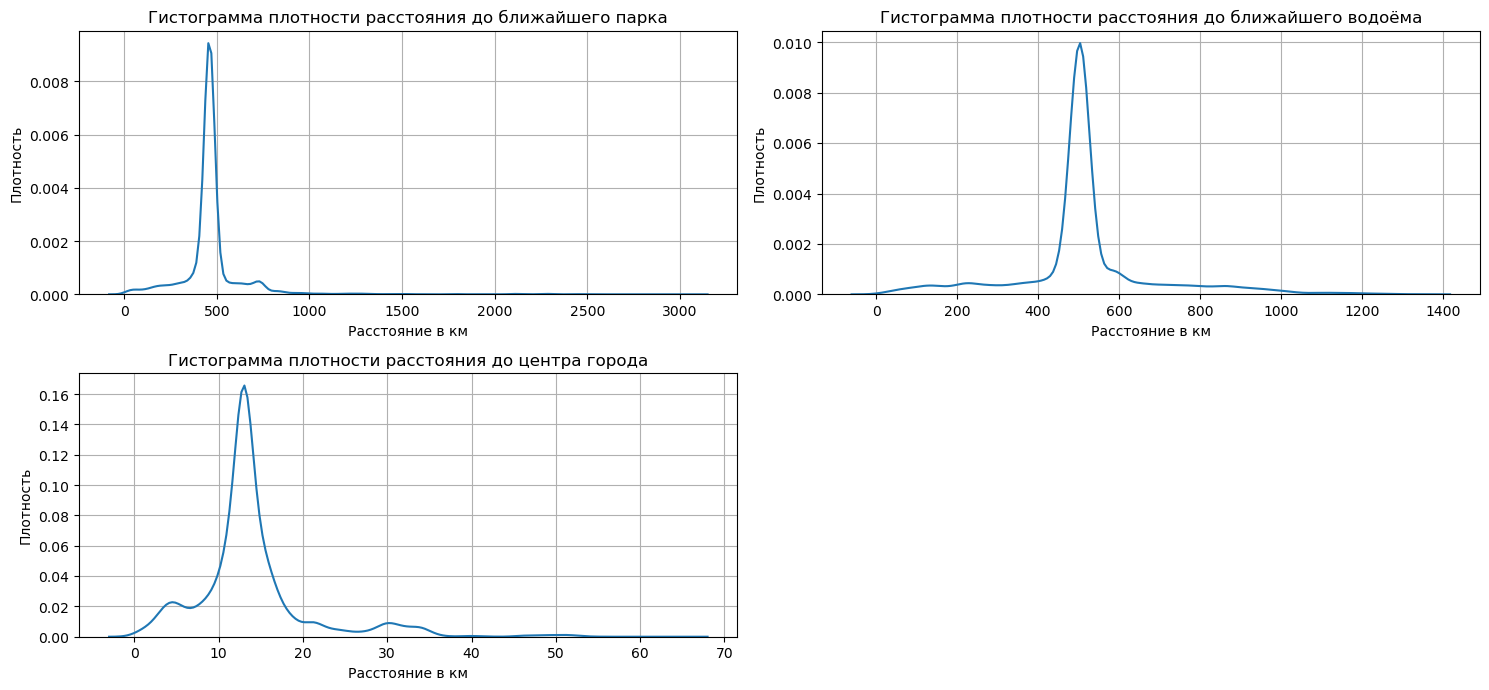

In [42]:
fig = plt.figure(figsize=(15, 10))

fig.add_subplot(321)
sns.kdeplot(x=data_good['parks_nearest'])
plt.title(label='Гистограмма плотности расстояния до ближайшего парка')
plt.grid(True)
plt.xlabel('Расстояние в км')
plt.ylabel('Плотность')

fig.add_subplot(322)
sns.kdeplot(x=data_good['ponds_nearest'])
plt.title(label='Гистограмма плотности расстояния до ближайшего водоёма')
plt.grid(True)
plt.xlabel('Расстояние в км')
plt.ylabel('Плотность')

fig.add_subplot(323)
sns.kdeplot(x=data_good['city_centers_nearest_km'])
plt.title(label='Гистограмма плотности расстояния до центра города')
plt.grid(True)
plt.xlabel('Расстояние в км')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show();

**Гистограммы выглядят ожидаемо плохо.** Огромные пики, присутствующие на них - медианные значения, для оставшейся маленькой выборки. Среди всех наименее пострадали данные о **расположении жилья относительно центра города**, в котором и пропусков было меньше всего (~20%). **Использовать такие данные для анализа каких-либо закономерностей опасно.**

И последнее, посмотрим, **как зависит число объявлений от месяца и дня недели:**

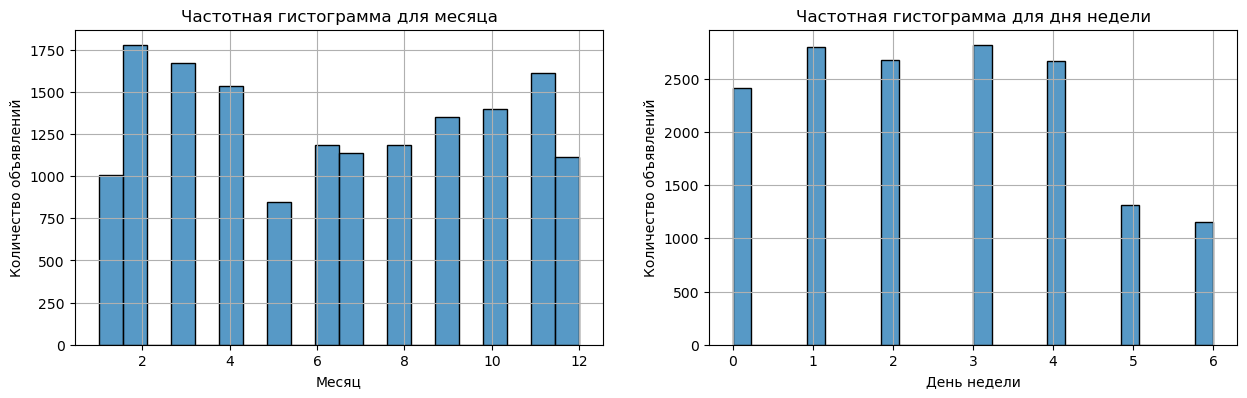

In [43]:
# построение частотных гистограмм 
fig = plt.figure(figsize=(15, 9))

fig.add_subplot(221)
sns.histplot(data_good['month_exposition']) 
plt.title('Частотная гистограмма для месяца')
plt.ylabel('Количество объявлений')
plt.xlabel('Месяц')
plt.grid(True)

fig.add_subplot(222)
sns.histplot(data_good['weekday_exposition']) 
plt.title('Частотная гистограмма для дня недели')
plt.ylabel('Количество объявлений')
plt.xlabel('День недели')
plt.grid(True)

plt.show();

**Спад количества объявлений в декабре, январе и мае выглядит логично - конец года и много праздничных дней**, не до объявлений. А **уменьшение числа объявлений летом в сравнении с весной и осенью связано с большим числом отпусков в этот период**, скорее всего. Недельные тенденции также закономерны - **в выходные дни люди предпочитают отдыхать, а не давать объявления**.

#### Изучение скорости продажи квартир

Посмотрим, **как быстро квартиры продаются**. Для этого **построим гистограмму**, посмотрим на **среднее, медиану и т.д.**

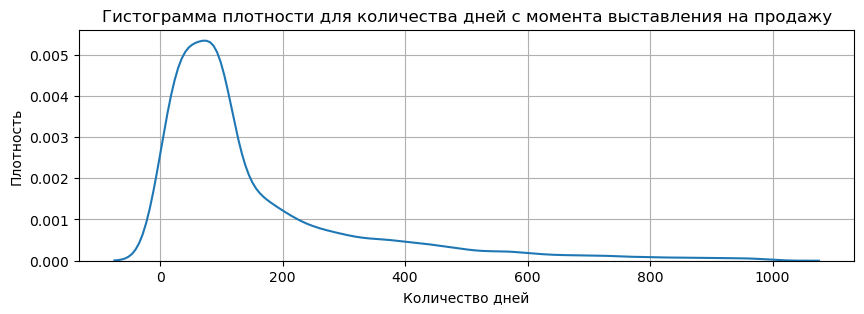

In [44]:
# построение гистограммы плотности для количества дней, прошедших от выставления объявления до продажи
plt.figure(figsize=(10, 3))

sns.kdeplot(x=data_good['days_exposition'])

plt.title(label='Гистограмма плотности для количества дней с момента выставления на продажу')
plt.grid(True)
plt.xlabel('Количество дней')
plt.ylabel('Плотность')
plt.show();

In [45]:
# статистические характеристики распределения
data_good['days_exposition'].describe() 

count    15834.000000
mean       155.509094
std        174.622676
min          1.000000
25%         45.000000
50%         95.000000
75%        189.000000
max       1000.000000
Name: days_exposition, dtype: float64

**Большая часть квартир продаётся в пределах 100 дней**. Особо выделяющийся пик на гистограмме в районе 100 связан, вероятно, с тем, что именно этим значением заполнялись пропуски. И не зря, хорошо видно, как **плохо сказались выбросы на среднем** - оно почти в два раза больше медианы. **Рассмотрим область 0-100 дней детальнее**. 

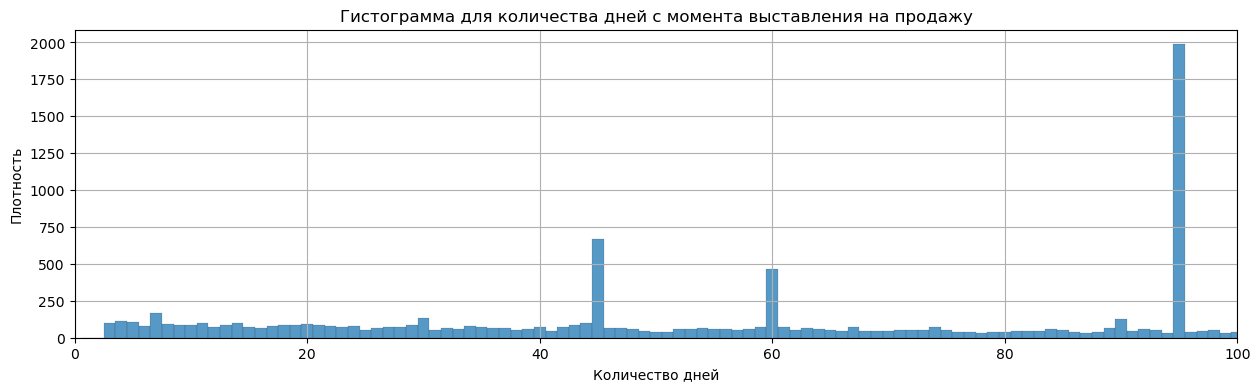

In [46]:
# построение гистограммы в диапозоне 0-100 дней
plt.figure(figsize=(15, 4))

sns.histplot(data_good['days_exposition'], bins=100, discrete=True)

plt.title(label='Гистограмма для количества дней с момента выставления на продажу')
plt.grid(True)
plt.xlabel('Количество дней')
plt.ylabel('Плотность')
plt.xlim((0, 100))
plt.show();

Ближайшее рассмотрение области показывает, что **значения на самом деле изменяются довольно плавно**. Медиане соответствует ~2100 значений. С другой строны, **есть ещё два пика, которые не могли быть вызваны нашим вмешательством** - около 45 и 60 дней. Более того, даже до заполнения пропусков по гистограмме было видно, что большая часть продаж происходит в первые 100 дней. Это **может быть связано с особенностями закрытия/продления объявлений** на сайте.

Чтобы определиться, какие продажи считать быстрыми, а какие необычно долгими, **посмотрим на диаграмму размаха**:

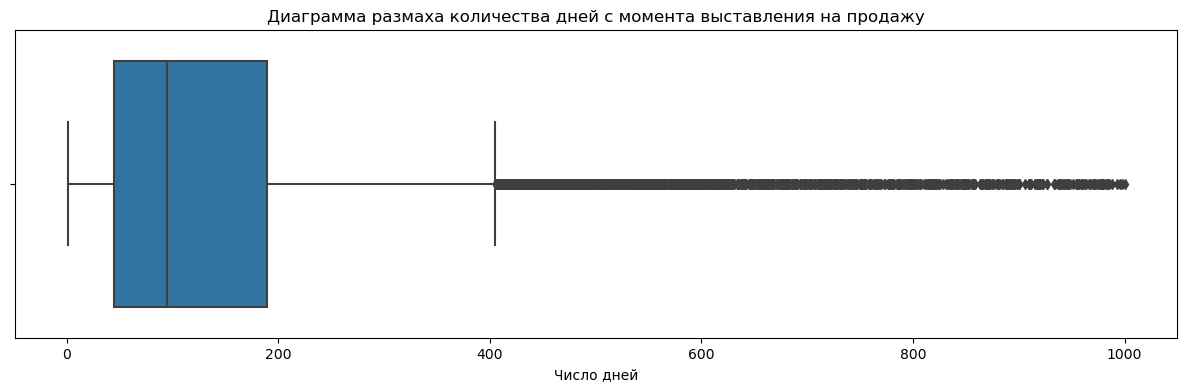

In [47]:
plt.figure(figsize=(15, 4))

sns.boxplot(x=data_good['days_exposition'])

plt.title(label='Диаграмма размаха количества дней с момента выставления на продажу')
plt.xlabel('Число дней')
plt.show();

Продажи **менее, чем за 45 дней** (первый квартиль) - **быстрыми**, в области **больше 200, но меньше 400 дней - долгими, а более, чем за 400** (выходят за пределы межквартильного размаха) - **необычно долгими**.  Таким образом, **в диапазоне 45-200 дней** будут лежать **"обычные" продажи**.

#### Факторы, больше всего влияющие на общую (полную) стоимость объекта

**В первую очередь на цену квартиры должна влиять её площадь.** Посмотрим на диаграммы рассеяния для различных площадей - общей, жилой и кухни. 

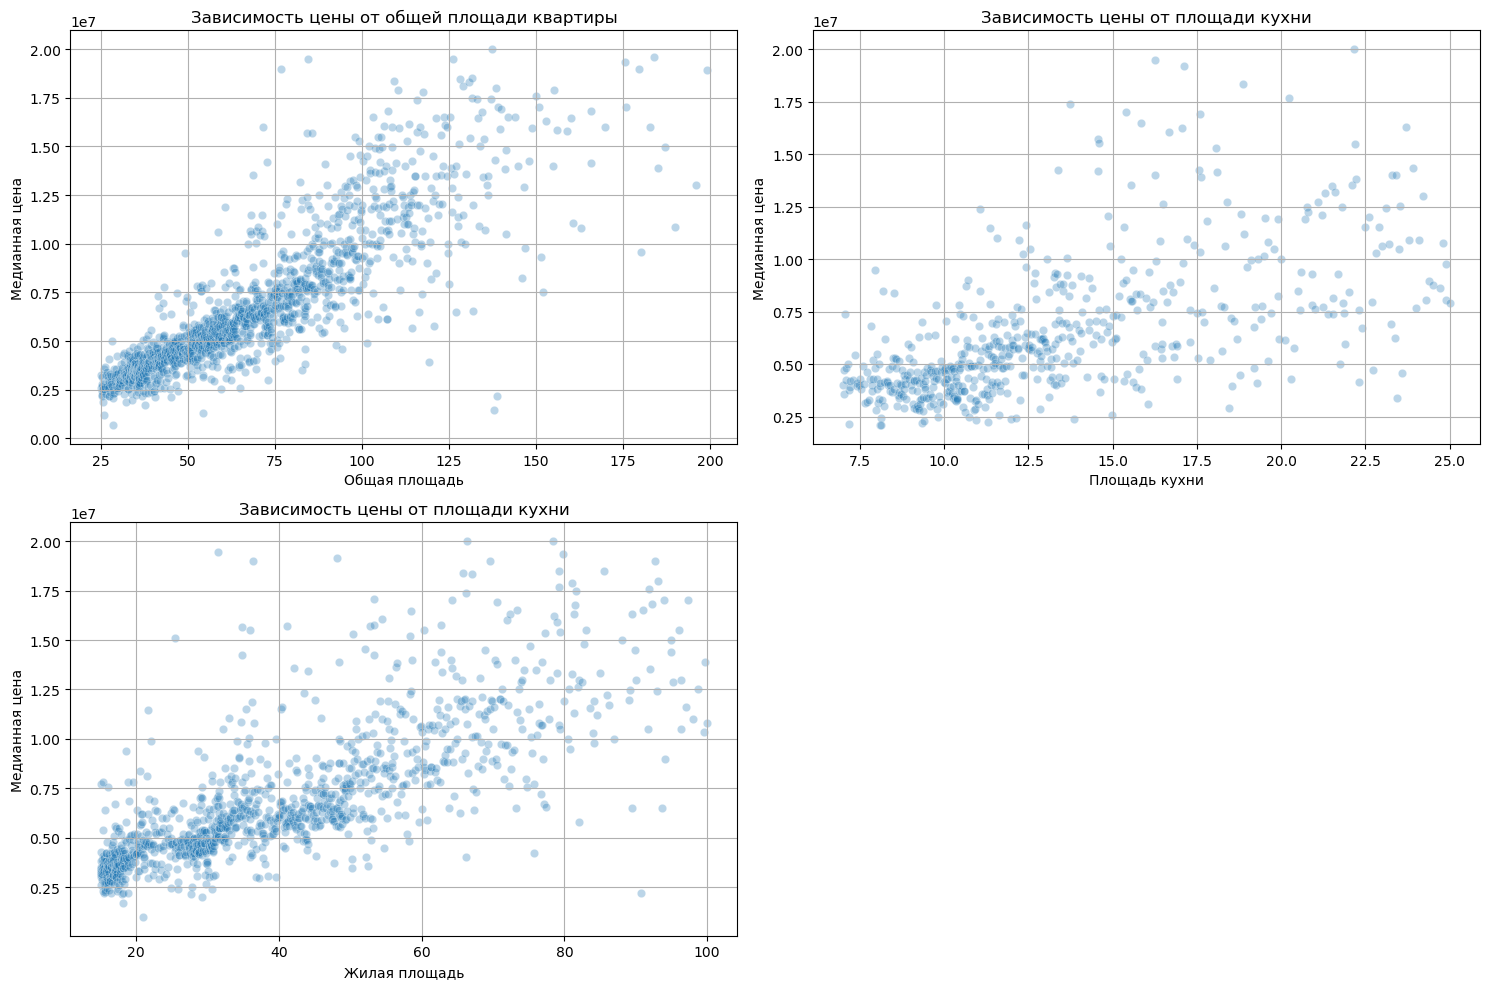

In [48]:
# создание сводной таблицы общая площадь - медианная стоимость 
total_pivot = data_good.pivot_table(index='total_area', values='last_price', aggfunc='median')
total_pivot['total_area'] = total_pivot.index
total_pivot.columns = ['median_price', 'total_area'] 

# создание сводной таблицы площадь кухни - медианная стоимость 
kitchen_pivot = data_good.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
kitchen_pivot['kitchen_area'] = kitchen_pivot.index 
kitchen_pivot.columns = ['median_price', 'kitchen_area']

# создание сводной таблицы жилая площадь - медианная стоимость 
living_pivot = data_good.pivot_table(index='living_area', values='last_price', aggfunc='median')
living_pivot['living_area'] = living_pivot.index 
living_pivot.columns = ['median_price', 'living_area'] 

# построение диаграмм рассеяния
fig = plt.figure(figsize=(15, 10))

fig.add_subplot(221)
sns.scatterplot(data=total_pivot, x='total_area', y='median_price', alpha=0.3) 
plt.title('Зависимость цены от общей площади квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Медианная цена')
plt.grid(True)

fig.add_subplot(222)
sns.scatterplot(data=kitchen_pivot, x='kitchen_area', y='median_price', alpha=0.3) 
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Медианная цена')
plt.xlabel('Площадь кухни')
plt.grid(True)

fig.add_subplot(223)
sns.scatterplot(data=living_pivot, x='living_area', y='median_price', alpha=0.3)
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Медианная цена')
plt.xlabel('Жилая площадь')
plt.grid(True)

plt.tight_layout()
plt.show();

In [49]:
# подсчёт коэффициентов Пирсона
print('Коэффициенты Пирсона зависимости медианной цены от:', '\n')
print('- общей площади:', round(total_pivot['median_price'].corr(total_pivot['total_area']), 2)) 
print('- площади кухни:', round(kitchen_pivot['median_price'].corr(kitchen_pivot['kitchen_area']), 2)) 
print('- жилой площади:', round(living_pivot['median_price'].corr(living_pivot['living_area']), 2))

Коэффициенты Пирсона зависимости медианной цены от: 

- общей площади: 0.86
- площади кухни: 0.61
- жилой площади: 0.77


Ожидаемо **видим сильную положительную корреляцию между ценой квартиры и общей площадью**, что отчётливо видно и по диаграмме рассеяния и по коэффициенту Пирсона. Для квартир с площадью более 100 м2 разброс увеличивается, что вероятно связано с малой выборкой для таких квартир.

Едва ли можно сказать, что какая-то из площадей - жилая или площадь кухни - влияет больше, хотя коэффициенты корреляции близки. **Более выраженная корреляция для жилой площади связана по большей части с тем, что она вносит больший вклад в общую площадь**, особенно с увеличением числа комнат. В подтверждение посмотрим на **зависимость цены от числа комнат**:  

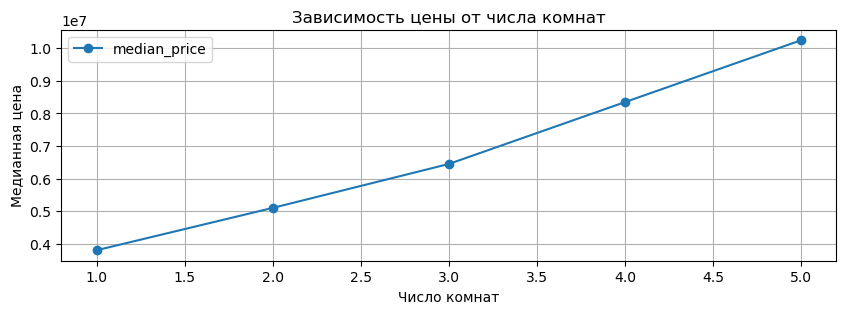

In [50]:
# создание сводной таблицы число комнат - медианная стоимость 
rooms_pivot = data_good.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_pivot['rooms'] = rooms_pivot.index 
rooms_pivot.columns = ['median_price', 'rooms'] 

# построение графика зависимости медианной цены от числа комнат
rooms_pivot.plot(x='rooms', y='median_price', style='o-', grid=True, figsize=(10, 3)) 
plt.title('Зависимость цены от числа комнат')
plt.ylabel('Медианная цена')
plt.xlabel('Число комнат')
plt.show();

In [51]:
# подсчёт коэффициента Пирсона
round(rooms_pivot['median_price'].corr(rooms_pivot['rooms']), 2) 

1.0

Действительно, наблюдаем почти идеальную **линейную зависимость цены квартиры от числа комнат** - чем больше, тем дороже - и **коэффициент Пирсона равный 1**. 

Ещё один **важный параметр - тип этажа**, построим график и для него:

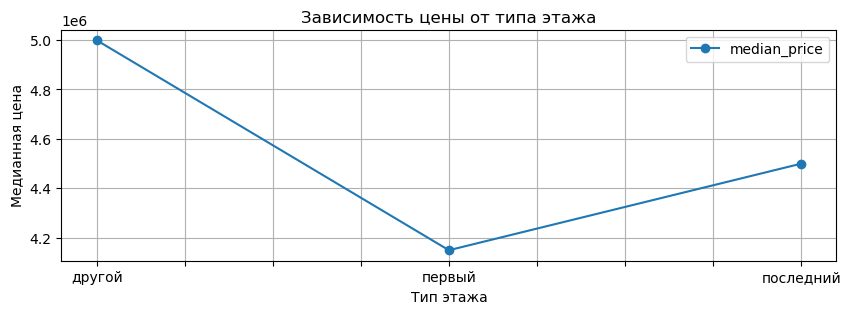

In [52]:
# создание сводной таблицы тип этажа - медианная стоимость 
floor_type_pivot = data_good.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_type_pivot['floor_type'] = floor_type_pivot.index 
floor_type_pivot.columns = ['median_price', 'floor_type'] 

# построение графика зависимости медианной цены от типа этажа
floor_type_pivot.plot(x='floor_type', y='median_price', style='o-', grid=True, figsize=(10, 3)) 
plt.title('Зависимость цены от типа этажа')
plt.ylabel('Медианная цена')
plt.xlabel('Тип этажа')
plt.show();

**Цены квартир на первом и последнем этажах значительно меньше**, что закономерно. Достаточно интересно, что **квартирам на последнем этаже предпочтение отдают всё же чаще, чем на первом**.

Посмотрим есть ли **закономерности между временем подачи объявления и ценой:**

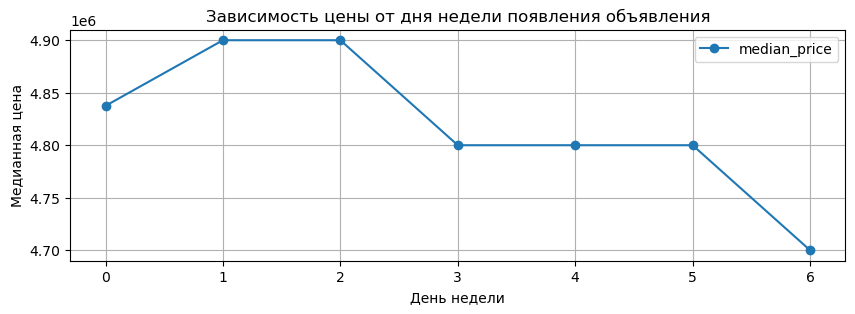

In [53]:
# создание сводной таблицы день недели - медианная стоимость 
weekday_exposition_pivot = data_good.pivot_table(index='weekday_exposition', values='last_price', aggfunc='median')
weekday_exposition_pivot['weekday_exposition'] = weekday_exposition_pivot.index 
weekday_exposition_pivot.columns = ['median_price', 'weekday_exposition'] 

# построение графика зависимости медианной цены от дня недели появления объявления
weekday_exposition_pivot.plot(x='weekday_exposition', y='median_price', style='o-', grid=True, figsize=(10, 3))
plt.title('Зависимость цены от дня недели появления объявления')
plt.ylabel('Медианная цена')
plt.xlabel('День недели')
plt.show();

In [54]:
# подсчёт коэффициента Пирсона
round(weekday_exposition_pivot['median_price'].corr(weekday_exposition_pivot['weekday_exposition']), 2) 

-0.79

Во-первых, стоит отметить, что несмотря на кажущуюся закономерность и высокий коэффициент Пирсона, **абсолютная разница в медианной стоимости небольшая** - все значения укладываюся в диапозон 200 тыс., что составляет **около 4% от средней стоимости**. По этой причине я бы сказала, что **особой зависимости между днём недели, в который было подано объявление, и ценой продажи нет**. 

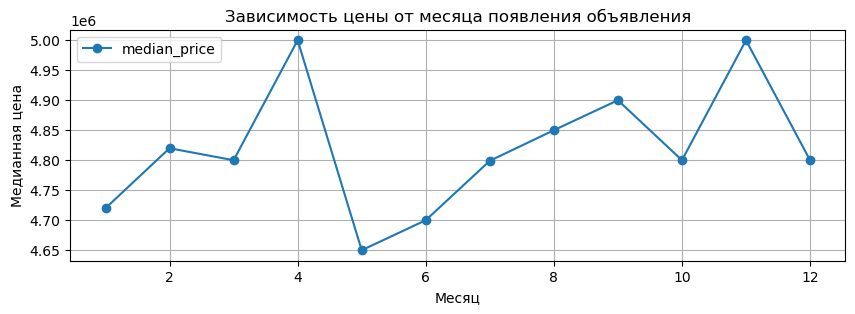

In [55]:
# создание сводной таблицы месяц - медианная стоимость 
month_exposition_pivot = data_good.pivot_table(index='month_exposition', values='last_price', aggfunc='median')
month_exposition_pivot['month_exposition'] = month_exposition_pivot.index 
month_exposition_pivot.columns = ['median_price', 'month_exposition'] 

# построение графика зависимости медианной цены от месяца появления объявления
month_exposition_pivot.plot(x='month_exposition', y='median_price', style='o-', grid=True, figsize=(10, 3))
plt.title('Зависимость цены от месяца появления объявления')
plt.ylabel('Медианная цена')
plt.xlabel('Месяц')
plt.show();

In [56]:
# подсчёт коэффициента Пирсона 
round(month_exposition_pivot['median_price'].corr(month_exposition_pivot['month_exposition']), 2) 

0.32

**Ситуация с месяцем подачи объявления аналогична тому, что видели для дня** - разброс медианных цен в рамках цены очень мал. И какой-либо корреляции нет.

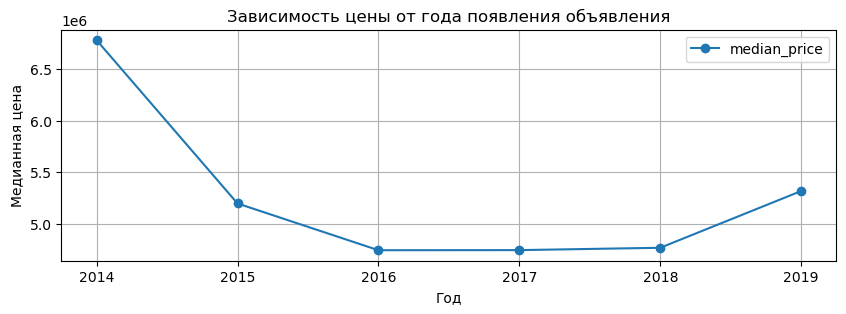

In [57]:
# создание сводной таблицы год - медианная стоимость 
year_exposition_pivot = data_good.pivot_table(index='year_exposition', values='last_price', aggfunc='median')
year_exposition_pivot['year_exposition'] = year_exposition_pivot.index 
year_exposition_pivot.columns = ['median_price', 'year_exposition'] 

# построение графика зависимости медианной цены от года появления объявления
year_exposition_pivot.plot(x='year_exposition', y='median_price', style='o-', grid=True, figsize=(10, 3))
plt.title('Зависимость цены от года появления объявления')
plt.ylabel('Медианная цена')
plt.xlabel('Год')
plt.show();

In [58]:
# подсчёт коэффициента Пирсона
round(year_exposition_pivot['median_price'].corr(year_exposition_pivot['year_exposition']), 2) 

-0.58

**Изменения цен на квартиры относительно года уже существена - порядка 2 млн**. Очень высокими цены на жильё были в 2014, затем наблюдался сильный спад и только в 2019 наметился рост цен. **Возможно, эти изменения связаны с  соотношением предложенияи спроса**, также стоит **проверить, как менялась цена за 1 м2 и площадь продаваемых квартир по годам**:

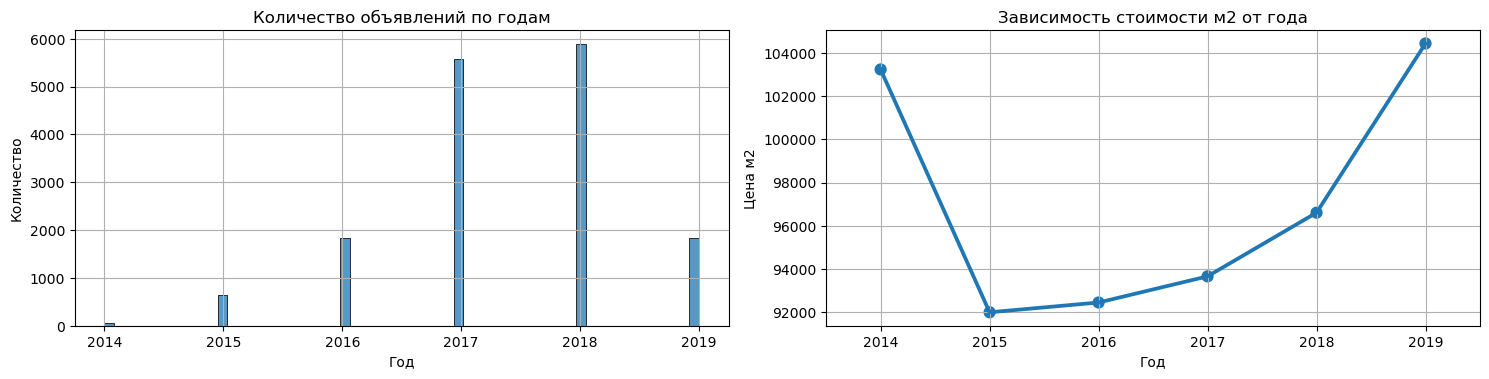

In [59]:
# создание сводной таблицы год - медианная стоимость м2 
square_meter_price_pivot = data_good.pivot_table(index='year_exposition', values='square_meter_price', aggfunc='median')
square_meter_price_pivot['year_exposition'] = square_meter_price_pivot.index 
square_meter_price_pivot.columns = ['square_meter_price', 'year_exposition'] 

# построение графиков
fig = plt.figure(figsize=(15, 7))

fig.add_subplot(221)
sns.histplot(data_good['year_exposition']) 
plt.title('Количество объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(True)

fig.add_subplot(222)
sns.pointplot(data=square_meter_price_pivot, x='year_exposition', y='square_meter_price') 
plt.title('Зависимость стоимости м2 от года')
plt.ylabel('Цена м2')
plt.xlabel('Год')
plt.grid(True)

plt.tight_layout()
plt.show();

Видим, что **в 2015 году наблюдалось сильное падение стоимости 1м2, однако далее цена начала расти** по экспоненте. 

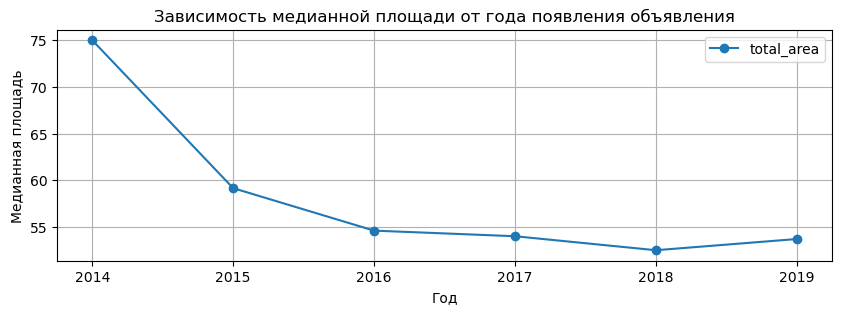

In [60]:
# создание сводной таблицы год - медианная общая площадь 
year_total_area_pivot = data_good.pivot_table(index='year_exposition', values='total_area', aggfunc='median')
year_total_area_pivot['year_exposition'] = year_total_area_pivot.index 
year_total_area_pivot.columns = ['total_area', 'year_exposition'] 

# построение графика зависимости медианной общей площади от года появления объявления
year_total_area_pivot.plot(x='year_exposition', y='total_area', style='o-', grid=True, figsize=(10, 3))
plt.title('Зависимость медианной площади от года появления объявления')
plt.ylabel('Медианная площадь')
plt.xlabel('Год')
plt.show();

Помимо высокой цены за 1 м2 **в 2014 году и общая площадь продаваемых квартир была очень большой на фоне последующих лет**. С 2016 площадь продаваемых квартир изменялась незначительно. 

Таким образом, **падение медианной стоимости квартир в 2015-2019 годах связано**, в первую очередь, **с изменением их площади**. С другой стороны, можно говорить о **стремительном росте цен на рынке недвижимости**. 

#### Cредняя цена 1 м2 в населённых пунктах с наибольшим числом объявлений

Интересно, **как меняются цены на квартиры в зависимости от населённого пункта**. **В рассмотрение** имеет смысл включить только **наиболее представленные населённые пункты**.

In [61]:
# создание сводной таблицы населённый пункт - цена
locality_name_pivot = data_good.pivot_table(index='locality_name', values='last_price', aggfunc=('median', 'mean', 'count'))
locality_name_pivot.index = locality_name_pivot.index.rename('Населённый пункт')
locality_name_pivot.columns = ['Количество объявлений', 'Средняя цена', 'Медианная цена'] 

locality_name_pivot.sort_values(by='Количество объявлений', ascending=False).head(10) 

,Количество объявлений,Средняя цена,Медианная цена
Населённый пункт,,,
Санкт-Петербург,10403,6.514081e+06,5650000.0
поселок Мурино,470,3.877857e+06,3600000.0
поселок Кудрово,397,4.497932e+06,3990000.0
поселок Шушары,375,4.261973e+06,4100000.0
Всеволожск,312,3.941786e+06,3695000.0
поселок Парголово,264,4.687362e+06,4365000.0
Колпино,223,4.049947e+06,3800000.0
Пушкин,222,6.498875e+06,6000000.0
Гатчина,180,3.888779e+06,3600000.0


**Наиболее дорогие квартиры в Санкт-Петербурге и Пушкине. А вот в Выборге цены самые низкие.**

#### Зависимость стоимости жилья в Санкт-Петербурге от расстояния до центра города

In [62]:
# срез данных по квартирам, расположенным в Санкт-Петербурге
data_petersburg = data_good.query('locality_name == "Санкт-Петербург"')

# создание сводной таблицы расстояние до центра - цена
data_petersburg_pivot = data_petersburg.pivot_table(index='city_centers_nearest_km', values='last_price', 
                                                    aggfunc=('median', 'mean', 'count'))
data_petersburg_pivot.index = data_petersburg_pivot.index.rename('Расстояние до центра в км')
data_petersburg_pivot.columns = ['Количество объявлений', 'Средняя цена', 'Медианная цена']

data_petersburg_pivot.sort_values(by='Расстояние до центра в км')

,Количество объявлений,Средняя цена,Медианная цена
Расстояние до центра в км,,,
0,24,9.248292e+06,8500000.0
1,95,9.414684e+06,8950000.0
2,115,9.163712e+06,8700000.0
3,259,8.716863e+06,7799000.0
4,425,9.357175e+06,8500000.0
5,386,8.815762e+06,8072500.0
6,267,8.675115e+06,7500000.0
7,264,8.322758e+06,7400000.0
8,360,7.565021e+06,6800000.0


Для наглядности построим **график зависимости медианной стоимости квартир от расстояния и посчитаем коэффициент Пирсона**: 

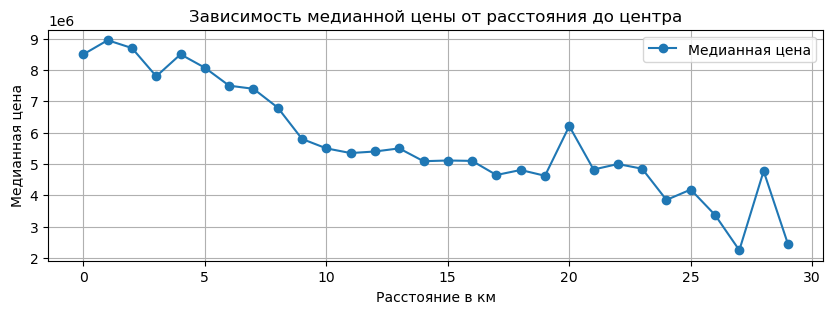

In [63]:
# создание столбца с информацией о расстоянии до центра
data_petersburg_pivot['Расстояние до центра в км'] = data_petersburg_pivot.index

# построение графика зависимости медианной цены от расстояния до центра
data_petersburg_pivot.plot(x='Расстояние до центра в км', y='Медианная цена', style='o-', grid=True, figsize=(10, 3))
plt.title('Зависимость медианной цены от расстояния до центра')
plt.ylabel('Медианная цена')
plt.xlabel('Расстояние в км')
plt.show();

In [64]:
# подсчёт коэффициент Пирсона
round(data_petersburg_pivot['Медианная цена'].corr(data_petersburg_pivot['Расстояние до центра в км']), 2)

-0.92

**Общая тенденция - уменьшение средней стоимости квартир по мере удаления от центра Санкт-Петербурга**, это хорошо видно и на графике и по коэффициенту Пирсона, который стремится к -1. Есть и некоторые **выбивающиеся значения - на 20 и 28 км**.

### Результаты и выводы

В ходе изучения данных было **обнаружено большое число пропусков**. В столбцах связанных с географическим положением квартир, площадями, ценой и другими количественными характеристиками пропуски были заполнены медианным значением. Пропуски в столбцах с числом балконов и апартаментами были заполнены "0". Данные с пропусками в названии населённых пунктов и общем числе этажей были удалены (менее 1%). Также из датасета были **удалены значения-выбросы**.

Анализ данных показал, что **продажа квартиры происходит обычно в течение 45-100 дней**, хотя есть и очень быстрые продажи (менее 45 дней), и необычно долгие (более 400 дней). Есть здесь и **пиковые значения - 45, 60 и 95 дней**, которые могут быть связаны с особенностью работы платформы.

Гипотезы в основном подтвердились:

1. **Общая площадь квартиры** и, как следствие, число комнат. При этом нельзя сказать, что на цену сильно влияет конкретно площадь кухни или жилая, важна, в первую очередь, именно общая. 
2. Как и ожидалось, **наименее привлекательны первый и последний**. Стоит отметить, что между первым и последним этажами предпочтение всё же отдают последнему.
3. Цены на квартиры разнятся в разных населённых пунктах. **Наиболее дорогие квартиры в Санкт-Петербурге и Пушкине**, при этом в Пушкине они даже немного выше, что, вероятно, связано с исторической значимостью последнего. Наиболее дешёвые квартиры среди населённых пунктов с большим числом предложений в Выбоге.
4. В Санкт-Петербурге на цену квартир **сильно влияет расстояние до центра - чем ближе, тем дороже**.
5. Как оказалось, **с годами** с одной стороны **наблюдается сильный рост цен за квадратный метр**, с другой стороны, **упала площадь продаваемых квартир**.

**Рынок недвижимости в Санкт-Петербурге и соседних населённых пунктах активно развивается** и является довольно перспективным: **цены на жильё растут, несмотря на общее увеличение числа предложений**. Наиболее выгодны для вложений квартиры ближе к центру Санкт- Петербурга. Более того, **квартиры не на первом/последнем этаже, гораздо проще продать, хоть они и дороже**. Стоит отметить и то, что **квартиры с большой площадью будут продаваться, вероятно, медленно** - из-за высокой цены за 1 м2 они будут слишком дорогими для быстрой продажи. 
